In [1]:
import pandas as pd
df = pd.read_csv('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/deletion_effects_effects_human_water_30_nucleotides.csv')

In [2]:
df.head()

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability
0,ENST00000000233,0,30,0.000000,0.044434
1,ENST00000000233,15,45,0.000000,0.044434
2,ENST00000000233,30,60,0.000000,0.044434
3,ENST00000000233,45,75,0.000000,0.044434
4,ENST00000000233,60,90,-0.001953,0.042480


<AxesSubplot:>

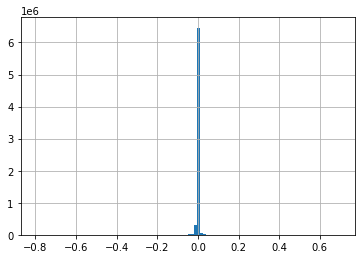

In [3]:
df['difference'].hist(bins = 100)

<AxesSubplot:>

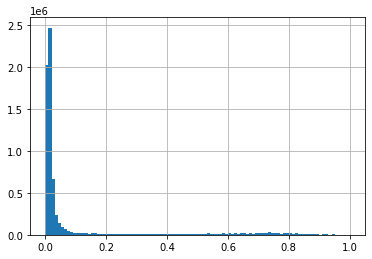

In [4]:
df['synapse_probability'].hist(bins = 100)

<AxesSubplot:xlabel='synapse_probability', ylabel='difference'>

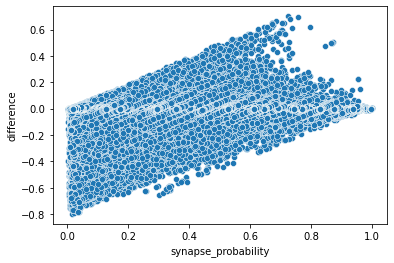

In [5]:
import seaborn as sns
sns.scatterplot(data = df, x = 'synapse_probability', y = 'difference')

In [6]:
# !head /tscc/nfs/home/yumei/Documents/reference_files/Ensembl_mouse_mRNA_cdna_5utr_3utr.csv 


In [7]:
annotation = pd.read_csv('/tscc/nfs/home/yumei/Documents/ensembl_human_seq/Ensembl_human_mRNA_cdna_5utr_3utr.csv')

In [8]:
!ls /tscc/nfs/home/yumei/Documents/ensembl_human_seq/Ensembl_human_mRNA_cdna_5utr_3utr.csv -al

-rwxr--r-- 1 yumei yeo-group 638758598 Jun 25 12:14 /tscc/nfs/home/yumei/Documents/ensembl_human_seq/Ensembl_human_mRNA_cdna_5utr_3utr.csv


In [9]:
annotation.head()

,trans_id,symbols_df1,gene_id_df1,gene_types,cdna sequences,cdna length,5UTR sequences,5UTR length,symbols_df2,gene_id_df2,3UTR sequences,3UTR length
0,ENST00000000233,ARF5,ENSG00000004059,protein_coding,CTGCTGCTGCTGCGCCCCATCCCCCCGCGGCCGGCCAGTTCCAGCC...,1032,CTGCTGCTGCTGCGCCCCATCCCCCCGCGGCCGGCCAGTTCCAGCC...,88,ARF5,ENSG00000004059,CCAGCCAGGGGCAGGCCCCTGATGCCCGGAAGCTCCTGCGTGCATC...,401
1,ENST00000000412,M6PR,ENSG00000003056,protein_coding,AGAGTGGGGCACAGCGAGGCGCTAGGGGGAACGCTGGCCTCTGAAA...,2450,AGAGTGGGGCACAGCGAGGCGCTAGGGGGAACGCTGGCCTCTGAAA...,159,M6PR,ENSG00000003056,ATTGCACTTTATATGTCCAGCCTCTTCCTCAGTCCCCCAAACCAAA...,1457
2,ENST00000000442,ESRRA,ENSG00000173153,protein_coding,GTCAGCTGGAGGAAGCGGAGTAGGAAGCGGCCGCGATGTCCTTTTG...,2274,GTCAGCTGGAGGAAGCGGAGTAGGAAGCGGCCGCGATGTCCTTTTG...,225,ESRRA,ENSG00000173153,GGCAAGGGGTGGGACTGGTGGGGGTTCTGGCAGGACCTGCCTAGCA...,777
3,ENST00000001008,FKBP4,ENSG00000004478,protein_coding,CCTACCCCAGCTCTCGCGCCGCGTGCAGAGGTGCTCAAGCCTCCTC...,3715,CCTACCCCAGCTCTCGCGCCGCGTGCAGAGGTGCTCAAGCCTCCTC...,170,FKBP4,ENSG00000004478,CCCCTCTCCACCAGCCCTACTCCTGCGGCTGCCTGCCCCCCAGTCT...,2165
4,ENST00000001146,CYP26B1,ENSG00000003137,protein_coding,ACAGCCAATCCCCCGAGCGGCCGCCAACATGCTCTTTGAGGGCTTG...,4556,ACAGCCAATCCCCCGAGCGGCCGCCAAC,28,CYP26B1,ENSG00000003137,CCCAAGACCCACCCGCCTCAGCCCAGCCCAGGCAGCGGGGTGGTGG...,2989


In [10]:
annotation.shape

(274578, 12)

In [11]:
ranges = annotation.set_index('trans_id')[['5UTR length', 'cdna length','3UTR length']]

In [12]:
ranges['cdna_end'] = ranges['cdna length']-ranges['3UTR length']

In [13]:
ranges.head()

,5UTR length,cdna length,3UTR length,cdna_end
trans_id,,,,
ENST00000000233,88,1032,401,631
ENST00000000412,159,2450,1457,993
ENST00000000442,225,2274,777,1497
ENST00000001008,170,3715,2165,1550
ENST00000001146,28,4556,2989,1567


In [14]:
(ranges['cdna_end']-ranges['5UTR length'])%3

trans_id
ENST00000000233    0
ENST00000000412    0
ENST00000000442    0
ENST00000001008    0
ENST00000001146    0
                  ..
ENST00000707134    0
ENST00000707135    0
ENST00000707136    1
ENST00000707137    1
ENST00000707138    1
Length: 274578, dtype: int64

# label if the df on what regions they are in

In [15]:
df = df.merge(ranges, left_on = 'transcript_id', right_index = True)

In [16]:
def return_annotation(row, col):
    if row[col]<= row['5UTR length']:
        return 'UTR5'
    else:
        if row[col]<=row['cdna_end']:
            return 'CDS'
        else:
            return 'UTR3'


In [17]:
df['start_annotation']=df.apply(lambda row: return_annotation(row, 'deletion_index_start'), axis = 1)
df['end_annotation']=df.apply(lambda row: return_annotation(row, 'deletion_index_end'), axis = 1)

In [18]:
pd.crosstab(df['start_annotation'], df['end_annotation'])

end_annotation,CDS,UTR3,UTR5
start_annotation,,,
CDS,3744150,52419,0
UTR3,0,2798521,0
UTR5,57086,10,317700


In [19]:
from pathlib import Path
outdir = Path('/tscc/nfs/home/hsher/ps-yeolab5/karen_data')

In [20]:
df['sequence']=df['transcript_id'].map(annotation.set_index('trans_id')['cdna sequences'])

In [21]:
df['subseq']= df.apply(lambda row: row['sequence'][row['deletion_index_start']:row['deletion_index_end']],
                     axis = 1)

In [22]:
df[['transcript_id', 'deletion_index_start', 'deletion_index_end','difference',
    'synapse_probability','start_annotation','end_annotation','subseq']].to_csv(outdir / 'Human_annotated_30bp.csv.gz',
                                                                               compression='gzip')